In [9]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import seaborn as sns

In [88]:
df = pd.read_csv("times_and_trades_bases/2025.07 inc/TT_NEG_WDO_2025_07_23 inc.txt.candles", delimiter="\t", low_memory=False)
df["datetime"] = pd.to_datetime(df["datetime"])
df

,datetime,open,high,low,close,daily_high_until_current_candle,daily_low_until_current_candle,sma,ema,total_buy_aggression_volume,...,impact,impact_average,expected_movement,real_movement,buy_aggression_per_displacement,sell_aggression_per_displacement,delta_aggression_per_displacement,buy_mad2,sell_mad2,delta_mad2
0,2025-07-23 09:00:00,5575.0,5579.5,5571.0,5575.5,-100000000.0,100000000.0,5584.6,5580.3,23833.0,...,0.000082,0.000000,0.000000,0.5,47666.000000,35528.000000,12138.000000,47666.0000,35528.0000,12138.0000
1,2025-07-23 09:05:00,5575.0,5582.0,5573.0,5579.5,5579.5,5571.0,5584.3,5580.1,19564.0,...,0.000631,0.000082,0.587164,4.5,4347.555664,2763.777832,1583.777832,8679.4004,6040.2002,2639.2000
2,2025-07-23 09:10:00,5580.0,5585.5,5577.0,5584.5,5582.0,5571.0,5584.7,5581.0,19334.0,...,0.001077,0.000379,1.582677,4.5,4296.444336,3368.222168,928.222229,6603.2632,4774.5264,1828.7368
3,2025-07-23 09:15:00,5584.0,5588.5,5582.0,5586.5,5585.5,5571.0,5584.9,5582.1,24797.0,...,0.000510,0.000547,2.682179,2.5,9918.799805,7956.799805,1962.000000,7294.0000,5437.5000,1856.5000
4,2025-07-23 09:20:00,5587.0,5588.0,5578.5,5579.0,5588.5,5571.0,5584.7,5581.5,16790.0,...,0.000605,0.000539,-7.118233,-8.0,2098.750000,3750.625000,1651.875000,5215.8999,4762.7500,1774.6500
5,2025-07-23 09:25:00,5579.0,5584.0,5578.0,5581.5,5588.5,5571.0,5584.2,5581.5,14256.0,...,0.000464,0.000441,2.377579,2.5,5702.399902,3547.600098,2154.800049,5269.9556,4627.7334,1816.8889
6,2025-07-23 09:30:00,5582.0,5584.0,5579.0,5583.0,5588.5,5571.0,5583.8,5581.8,10902.0,...,0.000482,0.000450,0.933841,1.0,10902.000000,8826.000000,2076.000000,5509.6172,4806.3828,1827.9149
7,2025-07-23 09:35:00,5582.5,5586.0,5581.5,5583.0,5588.5,5571.0,5583.2,5582.0,16286.0,...,0.000168,0.000454,1.352414,0.5,32572.000000,26612.000000,5960.000000,6073.4165,5260.6665,1914.0000
8,2025-07-23 09:40:00,5583.0,5586.5,5580.0,5582.0,5588.5,5571.0,5582.5,5582.0,19380.0,...,0.001256,0.000410,-0.326464,-1.0,19380.000000,20176.000000,796.000000,6605.6802,5857.2798,1869.2800
9,2025-07-23 09:45:00,5582.0,5583.5,5578.0,5580.0,5588.5,5571.0,5581.7,5581.6,5653.0,...,0.000303,0.000374,-2.466275,-2.0,2826.500000,6122.500000,3296.000000,6325.7407,5876.9258,1974.9630


In [89]:
df["buy_aggression_per_displacement_median"] = df["buy_aggression_per_displacement"].expanding().median().shift(1).fillna(0)
df["sell_aggression_per_displacement_median"] = df["sell_aggression_per_displacement"].expanding().median().shift(1).fillna(0)
df["delta_aggression_per_displacement_median"] = df["delta_aggression_per_displacement"].expanding().median().shift(1).fillna(0)
df.loc[0, "buy_aggression_per_displacement_median"] = df["buy_aggression_per_displacement"][0]
df.loc[0, "sell_aggression_per_displacement_median"] = df["sell_aggression_per_displacement"][0]
df.loc[0, "delta_aggression_per_displacement_median"] = df["delta_aggression_per_displacement"][0]

In [90]:
df["buy_aggression_per_displacement_std"] = abs(df["buy_aggression_per_displacement"] - df["buy_aggression_per_displacement_median"]).fillna(0)
df["sell_aggression_per_displacement_std"] = abs(df["sell_aggression_per_displacement"] - df["sell_aggression_per_displacement_median"]).fillna(0)
df["delta_aggression_per_displacement_std"] = abs(df["delta_aggression_per_displacement"] - df["delta_aggression_per_displacement_median"]).fillna(0)

In [91]:
df["buy_std_median"] = df["buy_aggression_per_displacement_std"].expanding().median().shift(1)
df["sell_std_median"] = df["sell_aggression_per_displacement_std"].expanding().median().shift(1)
df["delta_std_median"] = df["delta_aggression_per_displacement_std"].expanding().median().shift(1)

In [92]:
df["buy_std_median_adjusted"] = df["buy_std_median"] * 1.4826
df["sell_std_median_adjusted"] = df["sell_std_median"] * 1.4826
df["delta_std_median_adjusted"] = df["delta_std_median"] * 1.4826

In [93]:
df["buy_z_score"] = (df["buy_aggression_per_displacement"] - df["buy_aggression_per_displacement_median"]) / df["buy_std_median_adjusted"]
df["sell_z_score"] = (df["sell_aggression_per_displacement"] - df["sell_aggression_per_displacement_median"]) / df["sell_std_median_adjusted"]
df["delta_z_score"] = (df["delta_aggression_per_displacement"] - df["delta_aggression_per_displacement_median"]) / df["delta_std_median_adjusted"]

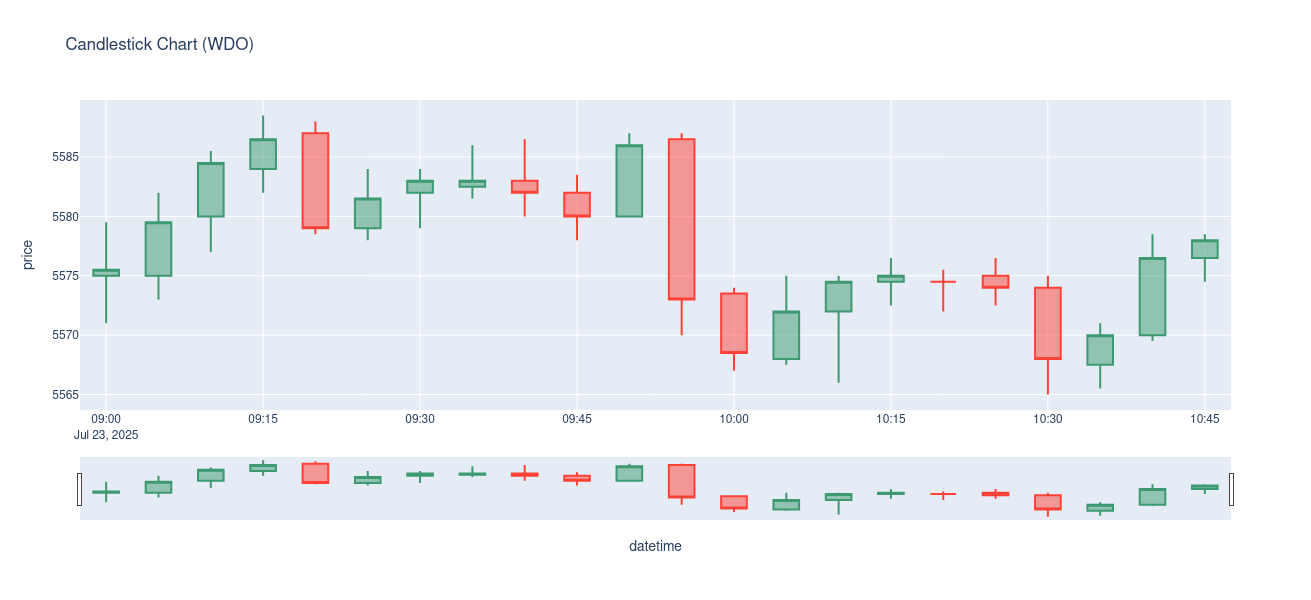

In [94]:
fig = go.Figure(data=[go.Candlestick(x=df["datetime"],
                                     open=df["open"],
                                     high=df["high"],
                                     low=df["low"],
                                     close=df["close"],
                                     name="Candles")])

fig.update_layout(title='Candlestick Chart (WDO)',
                  xaxis_title="datetime",
                  yaxis_title="price",
                  xaxis_rangeslider_visible=True,
                  height=600,
                  width=1000)

In [95]:
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
datetime,2025-07-23 09:00:00,2025-07-23 09:05:00,2025-07-23 09:10:00,2025-07-23 09:15:00,2025-07-23 09:20:00,2025-07-23 09:25:00,2025-07-23 09:30:00,2025-07-23 09:35:00,2025-07-23 09:40:00,2025-07-23 09:45:00,...,2025-07-23 10:00:00,2025-07-23 10:05:00,2025-07-23 10:10:00,2025-07-23 10:15:00,2025-07-23 10:20:00,2025-07-23 10:25:00,2025-07-23 10:30:00,2025-07-23 10:35:00,2025-07-23 10:40:00,2025-07-23 10:45:00
open,5575.0,5575.0,5580.0,5584.0,5587.0,5579.0,5582.0,5582.5,5583.0,5582.0,...,5573.5,5568.0,5572.0,5574.5,5574.5,5575.0,5574.0,5567.5,5570.0,5576.5
high,5579.5,5582.0,5585.5,5588.5,5588.0,5584.0,5584.0,5586.0,5586.5,5583.5,...,5574.0,5575.0,5575.0,5576.5,5575.5,5576.5,5575.0,5571.0,5578.5,5578.5
low,5571.0,5573.0,5577.0,5582.0,5578.5,5578.0,5579.0,5581.5,5580.0,5578.0,...,5567.0,5567.5,5566.0,5572.5,5572.0,5572.5,5565.0,5565.5,5569.5,5574.5
close,5575.5,5579.5,5584.5,5586.5,5579.0,5581.5,5583.0,5583.0,5582.0,5580.0,...,5568.5,5572.0,5574.5,5575.0,5574.5,5574.0,5568.0,5570.0,5576.5,5578.0
daily_high_until_current_candle,-100000000.0,5579.5,5582.0,5585.5,5588.5,5588.5,5588.5,5588.5,5588.5,5588.5,...,5588.5,5588.5,5588.5,5588.5,5588.5,5588.5,5588.5,5588.5,5588.5,0.0
daily_low_until_current_candle,100000000.0,5571.0,5571.0,5571.0,5571.0,5571.0,5571.0,5571.0,5571.0,5571.0,...,5570.0,5567.0,5567.0,5566.0,5566.0,5566.0,5566.0,5565.0,5565.0,0.0
sma,5584.6,5584.3,5584.7,5584.9,5584.7,5584.2,5583.8,5583.2,5582.5,5581.7,...,5580.0,5579.4,5579.1,5578.9,5578.9,5578.6,5578.0,5577.5,5577.5,5577.5
ema,5580.3,5580.1,5581.0,5582.1,5581.5,5581.5,5581.8,5582.0,5582.0,5581.6,...,5578.2,5576.9,5576.5,5576.2,5575.8,5575.5,5574.0,5573.2,5573.8,5574.7
total_buy_aggression_volume,23833.0,19564.0,19334.0,24797.0,16790.0,14256.0,10902.0,16286.0,19380.0,5653.0,...,16347.0,18671.0,15889.0,10489.0,4761.0,5267.0,11251.0,10917.0,19244.0,0.0
